# EXPLORATORY DATA ANALYSIS ON CALL CENTER

Problem Statement :
RBS Board has hired services of Brent Associates to audit its accounts and the auditors have sought pay-out details to CallIn PLC. You are working with Brent Associates as data analyst and have been called in the team to render your services and investigate inconsistencies, if any. All information was tallied but the pay-outs given to CallIn PLC for the month of February 1999 were suspiciously incorrect and hence your major task is to audit this information and assess if payout has been accurately done and state exchequer has not been cheated upon.


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('february_data.csv')

In [3]:
df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server
0,AA0101,34536,0.0,0,PS,990201,07:02:47,07:02:56,00:00:00,00:00:00,AGENT,07:02:55,07:05:41,DORIT
1,AA0101,34537,0.0,0,PS,990201,07:31:45,07:31:55,00:00:00,00:00:00,AGENT,07:31:54,07:31:59,NO_SERVER
2,AA0101,34538,0.0,0,NW,990201,07:54:38,07:54:51,00:00:00,00:00:00,AGENT,07:54:49,07:56:21,TOVA
3,AA0101,34539,23317894.0,2,PS,990201,08:09:16,08:09:22,08:09:22,08:09:27,HANG,00:00:00,00:00:00,NO_SERVER
4,AA0101,34540,48178511.0,2,PS,990201,08:19:42,08:19:47,08:19:47,08:20:21,AGENT,08:20:20,08:22:04,MICHAL


In [4]:
df.shape

(33344, 14)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df[df.duplicated(keep='first')]

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server


no duplicates found

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33344 entries, 0 to 33343
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vru+line     33344 non-null  object 
 1   call_id      33344 non-null  int64  
 2   customer_id  33344 non-null  float64
 3   priority     33344 non-null  int64  
 4   type         33344 non-null  object 
 5   date         33344 non-null  int64  
 6   vru_entry    33344 non-null  object 
 7   vru_exit     33344 non-null  object 
 8   q_start      33344 non-null  object 
 9   q_exit       33344 non-null  object 
 10  outcome      33344 non-null  object 
 11  ser_start    33344 non-null  object 
 12  ser_exit     33344 non-null  object 
 13  server       33344 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 3.6+ MB


In [8]:
df['date'] = df['date'].astype(str).str.replace(r'(\w{2}(?!$))', r'\1/', regex=True)

In [9]:
df.head(2)

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server
0,AA0101,34536,0.0,0,PS,99/02/01,07:02:47,07:02:56,00:00:00,00:00:00,AGENT,07:02:55,07:05:41,DORIT
1,AA0101,34537,0.0,0,PS,99/02/01,07:31:45,07:31:55,00:00:00,00:00:00,AGENT,07:31:54,07:31:59,NO_SERVER


In [10]:
df['date']=pd.to_datetime(df['date']).dt.date   

In [11]:
df.head(2)

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server
0,AA0101,34536,0.0,0,PS,1999-02-01,07:02:47,07:02:56,00:00:00,00:00:00,AGENT,07:02:55,07:05:41,DORIT
1,AA0101,34537,0.0,0,PS,1999-02-01,07:31:45,07:31:55,00:00:00,00:00:00,AGENT,07:31:54,07:31:59,NO_SERVER


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33344 entries, 0 to 33343
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vru+line     33344 non-null  object 
 1   call_id      33344 non-null  int64  
 2   customer_id  33344 non-null  float64
 3   priority     33344 non-null  int64  
 4   type         33344 non-null  object 
 5   date         33344 non-null  object 
 6   vru_entry    33344 non-null  object 
 7   vru_exit     33344 non-null  object 
 8   q_start      33344 non-null  object 
 9   q_exit       33344 non-null  object 
 10  outcome      33344 non-null  object 
 11  ser_start    33344 non-null  object 
 12  ser_exit     33344 non-null  object 
 13  server       33344 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 3.6+ MB


In [13]:
df['vru_entry']=(pd.to_timedelta(df['vru_entry'].str.strip()))

In [14]:
df['vru_exit']=(pd.to_timedelta(df['vru_exit'].str.strip()))

In [15]:
df['q_start']=(pd.to_timedelta(df['q_start'].str.strip()))

In [16]:
df['q_exit']=(pd.to_timedelta(df['q_exit'].str.strip()))

In [17]:
df['ser_start']=(pd.to_timedelta(df['ser_start'].str.strip()))

In [18]:
df['ser_exit']=(pd.to_timedelta(df['ser_exit'].str.strip()))

In [19]:
df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server
0,AA0101,34536,0.0,0,PS,1999-02-01,0 days 07:02:47,0 days 07:02:56,0 days 00:00:00,0 days 00:00:00,AGENT,0 days 07:02:55,0 days 07:05:41,DORIT
1,AA0101,34537,0.0,0,PS,1999-02-01,0 days 07:31:45,0 days 07:31:55,0 days 00:00:00,0 days 00:00:00,AGENT,0 days 07:31:54,0 days 07:31:59,NO_SERVER
2,AA0101,34538,0.0,0,NW,1999-02-01,0 days 07:54:38,0 days 07:54:51,0 days 00:00:00,0 days 00:00:00,AGENT,0 days 07:54:49,0 days 07:56:21,TOVA
3,AA0101,34539,23317894.0,2,PS,1999-02-01,0 days 08:09:16,0 days 08:09:22,0 days 08:09:22,0 days 08:09:27,HANG,0 days 00:00:00,0 days 00:00:00,NO_SERVER
4,AA0101,34540,48178511.0,2,PS,1999-02-01,0 days 08:19:42,0 days 08:19:47,0 days 08:19:47,0 days 08:20:21,AGENT,0 days 08:20:20,0 days 08:22:04,MICHAL


In [20]:
df['vru_time']=df['vru_exit'] - df['vru_entry']

In [21]:
df['q_time']=df['q_exit'] - df['q_start']

In [22]:
df['ser_time']= df['ser_exit'] - df['ser_start']

In [23]:
df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time
0,AA0101,34536,0.0,0,PS,1999-02-01,0 days 07:02:47,0 days 07:02:56,0 days 00:00:00,0 days 00:00:00,AGENT,0 days 07:02:55,0 days 07:05:41,DORIT,0 days 00:00:09,0 days 00:00:00,0 days 00:02:46
1,AA0101,34537,0.0,0,PS,1999-02-01,0 days 07:31:45,0 days 07:31:55,0 days 00:00:00,0 days 00:00:00,AGENT,0 days 07:31:54,0 days 07:31:59,NO_SERVER,0 days 00:00:10,0 days 00:00:00,0 days 00:00:05
2,AA0101,34538,0.0,0,NW,1999-02-01,0 days 07:54:38,0 days 07:54:51,0 days 00:00:00,0 days 00:00:00,AGENT,0 days 07:54:49,0 days 07:56:21,TOVA,0 days 00:00:13,0 days 00:00:00,0 days 00:01:32
3,AA0101,34539,23317894.0,2,PS,1999-02-01,0 days 08:09:16,0 days 08:09:22,0 days 08:09:22,0 days 08:09:27,HANG,0 days 00:00:00,0 days 00:00:00,NO_SERVER,0 days 00:00:06,0 days 00:00:05,0 days 00:00:00
4,AA0101,34540,48178511.0,2,PS,1999-02-01,0 days 08:19:42,0 days 08:19:47,0 days 08:19:47,0 days 08:20:21,AGENT,0 days 08:20:20,0 days 08:22:04,MICHAL,0 days 00:00:05,0 days 00:00:34,0 days 00:01:44


In [24]:
# shape after adding three new columns
df.shape

(33344, 17)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33344 entries, 0 to 33343
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   vru+line     33344 non-null  object         
 1   call_id      33344 non-null  int64          
 2   customer_id  33344 non-null  float64        
 3   priority     33344 non-null  int64          
 4   type         33344 non-null  object         
 5   date         33344 non-null  object         
 6   vru_entry    33344 non-null  timedelta64[ns]
 7   vru_exit     33344 non-null  timedelta64[ns]
 8   q_start      33344 non-null  timedelta64[ns]
 9   q_exit       33344 non-null  timedelta64[ns]
 10  outcome      33344 non-null  object         
 11  ser_start    33344 non-null  timedelta64[ns]
 12  ser_exit     33344 non-null  timedelta64[ns]
 13  server       33344 non-null  object         
 14  vru_time     33344 non-null  timedelta64[ns]
 15  q_time       33344 non-null  timedel

In [26]:
df.describe()

,call_id,customer_id,priority,vru_entry,vru_exit,q_start,q_exit,ser_start,ser_exit,vru_time,q_time,ser_time
count,33344.000000,3.334400e+04,33344.000000,33344,33344,33344,33344,33344,33344,33344,33344,33344
mean,27291.400372,3.139040e+08,0.685611,0 days 14:33:09.580284309,0 days 14:33:20.044145873,0 days 07:48:47.963981525,0 days 07:49:24.573236564,0 days 12:06:41.051073656,0 days 12:08:23.936660268,0 days 00:00:10.463861564,0 days 00:00:36.609255038,0 days 00:01:42.885586612
std,10127.469387,1.243254e+10,0.873233,0 days 04:30:02.028668708,0 days 04:30:02.045558130,0 days 07:41:31.325960364,0 days 07:42:03.139735476,0 days 06:54:14.101879134,0 days 06:55:06.119170415,0 days 00:00:25.638072343,0 days 00:11:12.564888866,0 days 00:31:38.732621534
min,1410.000000,0.000000e+00,0.000000,0 days 00:00:18,0 days 00:00:35,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,-1 days +23:56:48,-1 days +00:00:57,-1 days +00:00:58
25%,15107.750000,0.000000e+00,0.000000,0 days 10:50:33.750000,0 days 10:50:44,0 days 00:00:00,0 days 00:00:00,0 days 08:52:58.250000,0 days 08:55:14.500000,0 days 00:00:06,0 days 00:00:00,0 days 00:00:15
50%,31510.500000,0.000000e+00,0.000000,0 days 14:13:38,0 days 14:13:47,0 days 09:08:33.500000,0 days 09:09:53.500000,0 days 12:47:26.500000,0 days 12:50:00.500000,0 days 00:00:09,0 days 00:00:09,0 days 00:01:20
75%,35330.250000,2.813175e+07,2.000000,0 days 17:55:03.500000,0 days 17:55:12.250000,0 days 14:29:25.250000,0 days 14:30:13.500000,0 days 17:08:44.500000,0 days 17:11:09.750000,0 days 00:00:11,0 days 00:00:57,0 days 00:03:00
max,37369.000000,7.240000e+11,2.000000,0 days 23:59:56,0 days 23:59:59,0 days 23:59:29,0 days 23:58:58,0 days 23:59:58,0 days 23:59:57,0 days 00:31:00,0 days 00:15:08,0 days 01:11:04


## EDA

1.Univariate Analysis 2.Bivariate Analysis 3.Multivariate Analysis

In [27]:
dict={'vru+line':'vru_plus_line'}

In [28]:
df.rename(columns=dict,inplace=True)

In [29]:
df.head(1)

,vru_plus_line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time
0,AA0101,34536,0.0,0,PS,1999-02-01,0 days 07:02:47,0 days 07:02:56,0 days,0 days,AGENT,0 days 07:02:55,0 days 07:05:41,DORIT,0 days 00:00:09,0 days,0 days 00:02:46


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

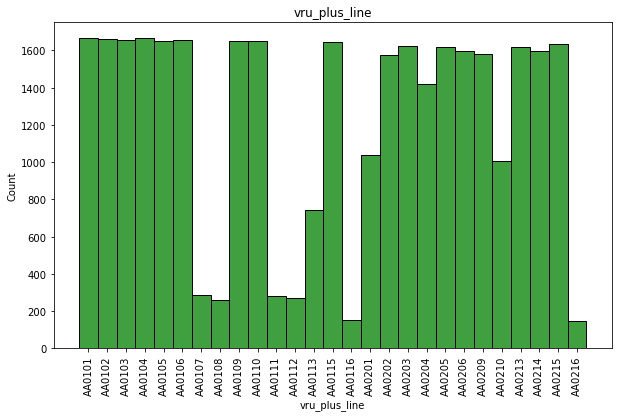

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df.vru_plus_line,color='green')
plt.xticks(rotation=90)
plt.title('vru_plus_line')
plt.show()

Each entering phone-call is first routed through a VRU: There are 6 VRUs labelled AA01 to AA06. Each VRU has several lines labelled 1-16. 

In [32]:
df.priority.value_counts()

0    19602
2     9119
1     4623
Name: priority, dtype: int64

0 and 1 indicate unidentified customers or regular customers and 2 indicates priority customers.

In [33]:
f=(df.priority==0) |(df.priority==1)
df.loc[f,'priority']=1

In [34]:
df.priority.value_counts()


1    24225
2     9119
Name: priority, dtype: int64

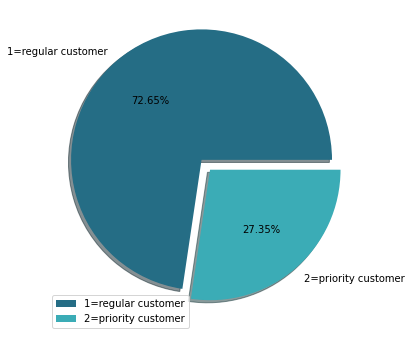

In [35]:
plt.figure(figsize= (6, 6))
data_pie  = [24225,9119]
labels = ["1=regular customer", "2=priority customer"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

we found that there are 72.65 % regualr customers and 27.35% priority customers

In [36]:
df.columns

Index(['vru_plus_line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'q_start', 'q_exit', 'outcome', 'ser_start',
       'ser_exit', 'server', 'vru_time', 'q_time', 'ser_time'],
      dtype='object')

In [37]:
df.type.value_counts()

PS    21460
NW     7604
NE     2750
TT     1088
IN      293
PE      149
Name: type, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


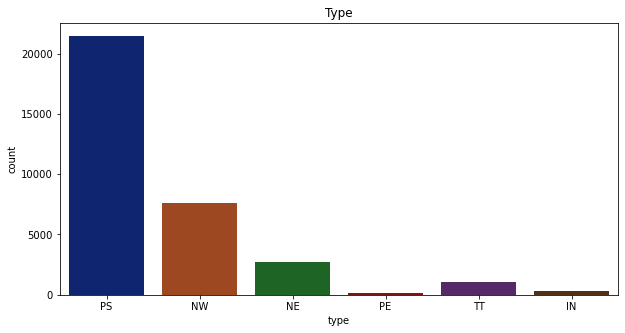

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(df.type,palette='dark')
plt.title('Type')
plt.show()

In [39]:
df.date.value_counts

<bound method IndexOpsMixin.value_counts of 0        1999-02-01
1        1999-02-01
2        1999-02-01
3        1999-02-01
4        1999-02-01
            ...    
33339    1999-02-26
33340    1999-02-26
33341    1999-02-28
33342    1999-02-28
33343    1999-02-28
Name: date, Length: 33344, dtype: object>

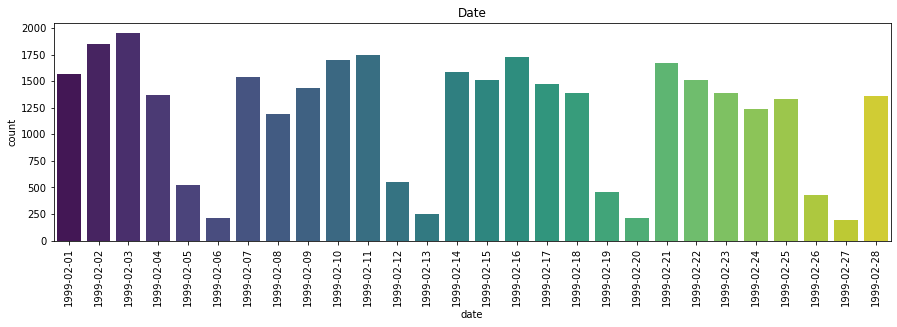

In [40]:
plt.figure(figsize=(15,4))
sns.countplot(x=df.date,palette='viridis')
plt.xticks(rotation=90)
plt.title('Date')
plt.show()

we get to know that we have february months data

In [41]:
df.columns

Index(['vru_plus_line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'q_start', 'q_exit', 'outcome', 'ser_start',
       'ser_exit', 'server', 'vru_time', 'q_time', 'ser_time'],
      dtype='object')

In [42]:
df.outcome.value_counts()

AGENT      27162
HANG        5904
PHANTOM      278
Name: outcome, dtype: int64

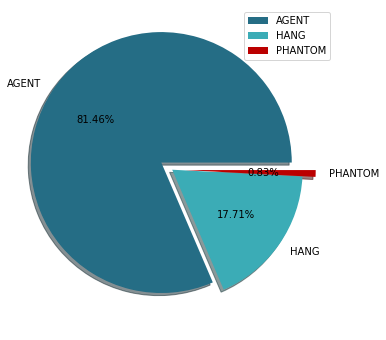

In [43]:
plt.figure(figsize= (6, 6))
data_pie  = [27162,5904,278]
labels = ["AGENT", "HANG","PHANTOM"]
explode = [0.1, 0, 0.1]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6','#BB0000'])
plt.legend()
plt.show()

There are 3 possible outcomes for each phone call:
AGENT – service,
HANG - hung up,
PHANTOM - a virtual call to be ignored 

In [44]:
df.server.unique()

array(['DORIT', 'NO_SERVER', 'TOVA', 'MICHAL', 'KAZAV', 'YITZ', 'ZOHARI',
       'YIFAT', 'GILI', 'DARMON', 'ANAT', 'AVNI', 'IDIT', 'BENSION',
       'SHLOMO', 'AVIDAN', 'PINHAS', 'BASCH', 'SHARON', 'ELI', 'NAAMA',
       'GELBER', 'MIKI', 'MORIAH', 'STEREN'], dtype=object)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


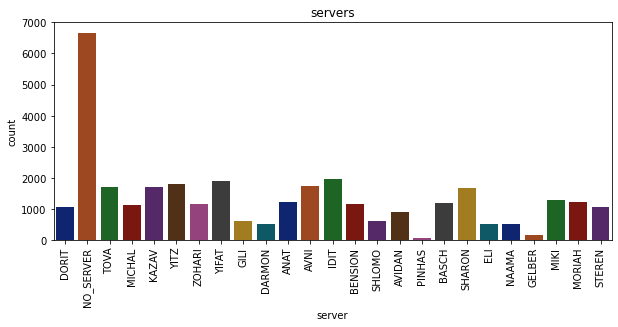

In [45]:
plt.figure(figsize=(10,4))
sns.countplot(df.server,palette='dark')
plt.xticks(rotation=90)
plt.title("servers")
plt.show()

Name of the agent who served the call. This field is NO_SERVER, if no service was provided.

In [46]:
df.head(2)

,vru_plus_line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time
0,AA0101,34536,0.0,1,PS,1999-02-01,0 days 07:02:47,0 days 07:02:56,0 days,0 days,AGENT,0 days 07:02:55,0 days 07:05:41,DORIT,0 days 00:00:09,0 days,0 days 00:02:46
1,AA0101,34537,0.0,1,PS,1999-02-01,0 days 07:31:45,0 days 07:31:55,0 days,0 days,AGENT,0 days 07:31:54,0 days 07:31:59,NO_SERVER,0 days 00:00:10,0 days,0 days 00:00:05


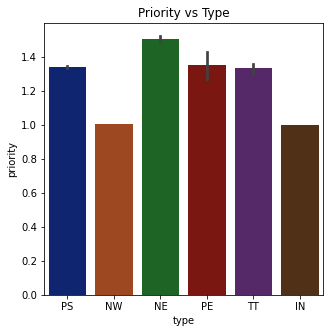

In [47]:
plt.figure(figsize=(5,5))
sns.barplot(x=df.type, y=df.priority,palette='dark')
plt.title("Priority vs Type")
plt.show()

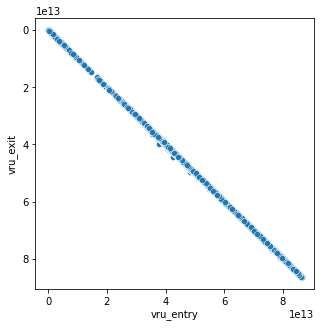

In [48]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df.vru_entry, y=df.vru_exit)
plt.show()

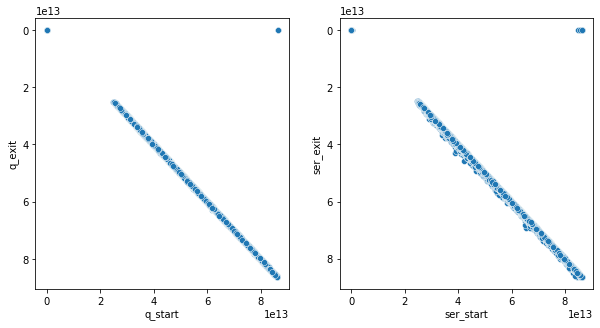

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df.q_start,y=df.q_exit)
plt.subplot(1,2,2)
sns.scatterplot(x=df.ser_start,y=df.ser_exit)
plt.show()

both graphs looking quit same

In [50]:
df.vru_time.value_counts()

0 days 00:00:06      7520
0 days 00:00:05      5212
0 days 00:00:09      5111
0 days 00:00:10      3952
0 days 00:00:11      1549
                     ... 
-1 days +23:59:04       1
0 days 00:04:39         1
0 days 00:00:55         1
0 days 00:01:50         1
0 days 00:02:07         1
Name: vru_time, Length: 209, dtype: int64

In [51]:
(df['vru_time'] < '0').sum().sum() 

25

In [52]:
df.q_time.value_counts()

0 days 00:00:00    15038
0 days 00:00:09      310
0 days 00:00:12      290
0 days 00:00:10      286
0 days 00:00:15      272
                   ...  
0 days 00:06:58        1
0 days 00:08:19        1
0 days 00:06:36        1
0 days 00:05:57        1
0 days 00:07:53        1
Name: q_time, Length: 472, dtype: int64

In [53]:
(df['q_time'] < '0').sum().sum()

2

In [54]:
df.ser_time.value_counts()

0 days 00:00:00    5893
0 days 00:00:03     354
0 days 00:00:04     324
0 days 00:00:05     231
0 days 00:00:02     229
                   ... 
0 days 00:13:15       1
0 days 00:20:54       1
0 days 00:14:06       1
0 days 00:27:25       1
0 days 00:21:52       1
Name: ser_time, Length: 1225, dtype: int64

In [55]:
(df['ser_time'] < '0').sum().sum()

16

we get to know that there are certain inconsistency in our data because above three columns vru_time, q_time and ser_time we found negative datetime values in vru_time 25 values are neagative, in q_time 2 negative values and in ser_time 16 negative values you can either drop it or leave as it is

<AxesSubplot:>

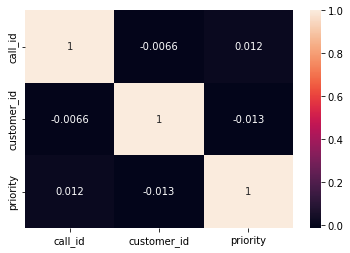

In [56]:
sns.heatmap(df.corr(),annot=True)

### VRU CHARGES

In [57]:
df['vru_time'].sum()

Timedelta('4 days 00:55:07')

In [58]:
days=4
minutes=55
seconds=7
days_seconds=days*24*60*60
print('days_seconds=',days_seconds)

days_seconds= 345600


In [59]:
minutes_seconds=minutes*60
print("minutes_seconds:",minutes_seconds)

minutes_seconds: 3300


In [60]:
total_vru_seconds=days_seconds+minutes_seconds+seconds
print("total_vru_seconds:",total_vru_seconds)

total_vru_seconds: 348907


VRU Call charges: These relate to the usage of VRU facility by RBS customers:
Calls handled by VRU are not billed to RBS upto a duration of 120,000 seconds 
From 120,001st second onwards, VRU calls are charged at EUR 0.5/ second.

In [61]:
vru_charges=(total_vru_seconds-120000)*0.5
print('vru_charges:',vru_charges)

vru_charges: 114453.5


### service time charges

In [62]:
df['ser_time'].sum()

Timedelta('39 days 16:56:57')

In [63]:
days=39
hours=16
minutes=56
seconds=57

In [64]:
ser_days_seconds=days*24*60*60
print('ser_days_seconds:',ser_days_seconds)

ser_days_seconds: 3369600


In [65]:
ser_hours_seconds=hours*60*60
print("ser_hours_seconds:",ser_hours_seconds)

ser_hours_seconds: 57600


In [66]:
ser_minutes_seconds=minutes*60
print("ser_minutes_seconds:",ser_minutes_seconds)

ser_minutes_seconds: 3360


In [67]:
print("second:",seconds)

second: 57


In [68]:
total_ser_seconds= ser_days_seconds + ser_hours_seconds + ser_minutes_seconds + seconds
print("total_ser_seconds:",total_ser_seconds)

total_ser_seconds: 3430617


Service Time Charges: This is the main avenue where CallIn PLC generates majority of revenue from the bank. This relates to calls that are transferred and handled by agents. 
Upto a total of 30,00,000 seconds, the RBS is billed at EUR 0.5/ second
From 30,00,001st minute onwards, the bill is raised at EUR 1/ second.


In [69]:
EUR1_charge=(total_ser_seconds-3000000)*1
EUR1_charge

430617

In [70]:
## upto 3000000 seconds 0.5 EUR charge per seconds
EUR_charge=3000000*0.5
EUR_charge

1500000.0

In [71]:
total_ser_charge=EUR1_charge+EUR_charge
print('total_ser_charge:',total_ser_charge)

total_ser_charge: 1930617.0


### q_penalty

In [72]:
df.head(2)

,vru_plus_line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time
0,AA0101,34536,0.0,1,PS,1999-02-01,0 days 07:02:47,0 days 07:02:56,0 days,0 days,AGENT,0 days 07:02:55,0 days 07:05:41,DORIT,0 days 00:00:09,0 days,0 days 00:02:46
1,AA0101,34537,0.0,1,PS,1999-02-01,0 days 07:31:45,0 days 07:31:55,0 days,0 days,AGENT,0 days 07:31:54,0 days 07:31:59,NO_SERVER,0 days 00:00:10,0 days,0 days 00:00:05


In [73]:
df['q_time'].sum()

Timedelta('14 days 03:04:59')

In [74]:
q_df=df[(df['q_time'] <= '0 days 00:01:00')]
q_df.head()

,vru_plus_line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time
0,AA0101,34536,0.0,1,PS,1999-02-01,0 days 07:02:47,0 days 07:02:56,0 days 00:00:00,0 days 00:00:00,AGENT,0 days 07:02:55,0 days 07:05:41,DORIT,0 days 00:00:09,0 days 00:00:00,0 days 00:02:46
1,AA0101,34537,0.0,1,PS,1999-02-01,0 days 07:31:45,0 days 07:31:55,0 days 00:00:00,0 days 00:00:00,AGENT,0 days 07:31:54,0 days 07:31:59,NO_SERVER,0 days 00:00:10,0 days 00:00:00,0 days 00:00:05
2,AA0101,34538,0.0,1,NW,1999-02-01,0 days 07:54:38,0 days 07:54:51,0 days 00:00:00,0 days 00:00:00,AGENT,0 days 07:54:49,0 days 07:56:21,TOVA,0 days 00:00:13,0 days 00:00:00,0 days 00:01:32
3,AA0101,34539,23317894.0,2,PS,1999-02-01,0 days 08:09:16,0 days 08:09:22,0 days 08:09:22,0 days 08:09:27,HANG,0 days 00:00:00,0 days 00:00:00,NO_SERVER,0 days 00:00:06,0 days 00:00:05,0 days 00:00:00
4,AA0101,34540,48178511.0,2,PS,1999-02-01,0 days 08:19:42,0 days 08:19:47,0 days 08:19:47,0 days 08:20:21,AGENT,0 days 08:20:20,0 days 08:22:04,MICHAL,0 days 00:00:05,0 days 00:00:34,0 days 00:01:44


In [75]:
q_df.shape

(25497, 17)

In [76]:
q_df['q_time'].sum()

Timedelta('1 days 06:28:41')

In [77]:
q_df1=df[(df['q_time'] > '0 days 00:01:00') & (df['q_time'] <= '0 days 00:03:00')]
q_df1.head()

,vru_plus_line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time
5,AA0101,34541,64852437.0,2,PS,1999-02-01,0 days 08:29:06,0 days 08:29:12,0 days 08:29:12,0 days 08:30:20,AGENT,0 days 08:30:19,0 days 08:35:13,KAZAV,0 days 00:00:06,0 days 00:01:08,0 days 00:04:54
15,AA0101,34551,56346398.0,1,PS,1999-02-01,0 days 10:03:42,0 days 10:03:48,0 days 10:03:48,0 days 10:06:10,AGENT,0 days 10:06:09,0 days 10:08:20,MICHAL,0 days 00:00:06,0 days 00:02:22,0 days 00:02:11
22,AA0101,34558,9288283.0,2,PS,1999-02-01,0 days 11:17:50,0 days 11:17:56,0 days 11:17:56,0 days 11:20:34,AGENT,0 days 11:20:33,0 days 11:22:10,YITZ,0 days 00:00:06,0 days 00:02:38,0 days 00:01:37
31,AA0101,34567,79746376.0,1,PS,1999-02-01,0 days 13:07:27,0 days 13:07:32,0 days 13:07:32,0 days 13:09:13,AGENT,0 days 13:09:12,0 days 13:12:43,ANAT,0 days 00:00:05,0 days 00:01:41,0 days 00:03:31
39,AA0101,34575,23571557.0,1,PS,1999-02-01,0 days 14:45:11,0 days 14:45:17,0 days 14:45:17,0 days 14:46:23,AGENT,0 days 14:46:21,0 days 14:47:19,MICHAL,0 days 00:00:06,0 days 00:01:06,0 days 00:00:58


In [78]:
q_df1.shape

(6036, 17)

In [79]:
q_df1['q_time'].sum()

Timedelta('7 days 10:36:51')

In [80]:
days=7
hours=10
minutes=36
days_total_minutes=days*24*60
print("days_total_minutes:",days_total_minutes)
hours_minutes=hours*60
print("hours_minutes:",hours_minutes)
print("minutes:",minutes)
total_minutes=days_total_minutes+hours_minutes+minutes
print("total_minutes:",total_minutes)
print("q penalty 0.5 EUR per minutes for q_time > 1 and <= 3 minutes:",total_minutes * 0.5)

days_total_minutes: 10080
hours_minutes: 600
minutes: 36
total_minutes: 10716
q penalty 0.5 EUR per minutes for q_time > 1 and <= 3 minutes: 5358.0


In [81]:
q_df2=df[(df['q_time'] > '0 days 00:03:00') & (df['q_time'] <= '0 days 00:05:00')]
q_df2.head()

,vru_plus_line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time
44,AA0101,34580,0.0,1,NW,1999-02-01,0 days 15:56:21,0 days 15:56:30,0 days 15:56:30,0 days 15:59:53,AGENT,0 days 15:59:52,0 days 16:02:33,AVNI,0 days 00:00:09,0 days 00:03:23,0 days 00:02:41
52,AA0101,34588,33966326.0,1,PS,1999-02-01,0 days 18:11:02,0 days 18:11:08,0 days 18:11:08,0 days 18:15:31,AGENT,0 days 18:15:31,0 days 18:16:53,IDIT,0 days 00:00:06,0 days 00:04:23,0 days 00:01:22
53,AA0101,34589,69607026.0,1,PS,1999-02-01,0 days 18:25:46,0 days 18:25:52,0 days 18:25:52,0 days 18:28:59,AGENT,0 days 18:28:58,0 days 18:29:06,ANAT,0 days 00:00:06,0 days 00:03:07,0 days 00:00:08
93,AA0101,34631,0.0,1,NW,1999-02-02,0 days 10:42:03,0 days 10:42:12,0 days 10:42:12,0 days 10:46:42,AGENT,0 days 10:46:40,0 days 10:47:10,IDIT,0 days 00:00:09,0 days 00:04:30,0 days 00:00:30
147,AA0101,34686,28842599.0,1,PS,1999-02-02,0 days 20:26:56,0 days 20:27:02,0 days 20:27:02,0 days 20:31:09,AGENT,0 days 20:31:08,0 days 20:32:26,SHARON,0 days 00:00:06,0 days 00:04:07,0 days 00:01:18


In [82]:
q_df2.shape

(1427, 17)

In [83]:
q_df2['q_time'].sum()

Timedelta('3 days 17:45:59')

In [84]:
days=3
hours=17
minutes=45
days_total_minutes=days*24*60
print("days_total_minutes:",days_total_minutes)
hours_minutes=hours*60
print("hours_minutes:",hours_minutes)
print("minutes:",minutes)
total_minutes=days_total_minutes+hours_minutes+minutes
print("total_minutes:",total_minutes)
print("q penalty 1EUR per minutes for q_time > 3 and <= 5 minutes:",total_minutes * 1)

days_total_minutes: 4320
hours_minutes: 1020
minutes: 45
total_minutes: 5385
q penalty 1EUR per minutes for q_time > 3 and <= 5 minutes: 5385


In [85]:
q_df3=df[(df['q_time'] > '0 days 00:05:00')]
q_df3.head()

,vru_plus_line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time
211,AA0101,34752,0.0,1,NW,1999-02-03,0 days 14:08:10,0 days 14:08:19,0 days 14:08:19,0 days 14:14:18,AGENT,0 days 14:14:17,0 days 14:16:44,IDIT,0 days 00:00:09,0 days 00:05:59,0 days 00:02:27
371,AA0101,34912,0.0,1,NW,1999-02-07,0 days 08:51:00,0 days 08:51:09,0 days 08:51:09,0 days 08:58:27,AGENT,0 days 08:58:26,0 days 09:00:40,AVNI,0 days 00:00:09,0 days 00:07:18,0 days 00:02:14
401,AA0101,34942,0.0,1,NW,1999-02-07,0 days 13:57:02,0 days 13:57:12,0 days 13:57:12,0 days 14:02:34,HANG,0 days 00:00:00,0 days 00:00:00,NO_SERVER,0 days 00:00:10,0 days 00:05:22,0 days 00:00:00
621,AA0101,35163,0.0,1,NW,1999-02-10,0 days 11:18:23,0 days 11:18:32,0 days 11:18:32,0 days 11:23:50,AGENT,0 days 11:23:49,0 days 11:24:38,YIFAT,0 days 00:00:09,0 days 00:05:18,0 days 00:00:49
694,AA0101,35238,69687275.0,2,NE,1999-02-11,0 days 10:03:00,0 days 10:03:05,0 days 10:03:05,0 days 10:09:03,AGENT,0 days 10:09:02,0 days 10:14:49,AVNI,0 days 00:00:05,0 days 00:05:58,0 days 00:05:47


In [86]:
q_df3.shape

(384, 17)

In [87]:
q_df3['q_time'].sum()

Timedelta('1 days 16:13:28')

In [88]:
days=1
hours=16
minutes=13
days_total_minutes=days*24*60
print("days_total_minutes:",days_total_minutes)
hours_minutes=hours*60
print("hours_minutes:",hours_minutes)
total_minutes=days_total_minutes+hours_minutes+minutes
print("total_minutes:",total_minutes)
print("q penalty 0.5 per minutes for q_time > 1 and < 3 minutes:",total_minutes * 2)

days_total_minutes: 1440
hours_minutes: 960
total_minutes: 2413
q penalty 0.5 per minutes for q_time > 1 and < 3 minutes: 4826


In [89]:
# total_q_penalty (Addition of all charges)
Total_q_penalty = 5358+5385+4826
print('Total_q_penalty:', Total_q_penalty)

Total_q_penalty: 15569


### call_disconnection penalty

Every customer that hangs up the call/ disconnects the call due to non-availability of agents is charged at EUR 10/ instance. These can be found by the calls where outcome is “AGENT” and server is “NO-SERVER”.

In [90]:
cd_penalty_df=df[(df['outcome'] == 'AGENT') & (df['server']== 'NO_SERVER')]

In [91]:
cd_penalty_df.head(2)

,vru_plus_line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time
1,AA0101,34537,0.0,1,PS,1999-02-01,0 days 07:31:45,0 days 07:31:55,0 days,0 days,AGENT,0 days 07:31:54,0 days 07:31:59,NO_SERVER,0 days 00:00:10,0 days,0 days 00:00:05
36,AA0101,34572,0.0,1,PS,1999-02-01,0 days 14:12:55,0 days 14:13:03,0 days,0 days,AGENT,0 days 14:13:03,0 days 14:13:08,NO_SERVER,0 days 00:00:08,0 days,0 days 00:00:05


In [92]:
cd_penalty_df.shape

(491, 17)

In [93]:
cd_penalty1=491*10
print("cd_penalty1:",cd_penalty1)

cd_penalty1: 4910


If the outcome is “HANG” and server is “NO-SERVER”, the penalty is applied at EUR 5/ instance. These charges are over and above the queue time.

In [94]:
cd_penalty_df2=df[(df['outcome'] == 'HANG') & (df['server']== 'NO_SERVER')]

In [95]:
cd_penalty_df2.head(2)

,vru_plus_line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_time,q_time,ser_time
3,AA0101,34539,23317894.0,2,PS,1999-02-01,0 days 08:09:16,0 days 08:09:22,0 days 08:09:22,0 days 08:09:27,HANG,0 days,0 days,NO_SERVER,0 days 00:00:06,0 days 00:00:05,0 days
14,AA0101,34550,27849181.0,1,PS,1999-02-01,0 days 09:57:59,0 days 09:58:05,0 days 09:58:05,0 days 09:58:13,HANG,0 days,0 days,NO_SERVER,0 days 00:00:06,0 days 00:00:08,0 days


In [96]:
cd_penalty_df2.shape

(5904, 17)

In [97]:
cd_penalty2=5904*5
print("cd_penalty2:",cd_penalty2)

cd_penalty2: 29520


In [98]:
Total_cd_penalty=cd_penalty1 + cd_penalty2
print("Total_cd_penalty:",Total_cd_penalty)

Total_cd_penalty: 34430


### SCHEDULE OF PAYMENT TO CALLIN PLC 

In [99]:
Fixed_fee = 1000000.00
TP_usage = 200000.00
Total_fixed_billing = Fixed_fee + TP_usage
Total_variable_billing = vru_charges + total_ser_charge
TOTAL_BILLED_AMOUNT = Total_fixed_billing + Total_variable_billing
Total_penalty = Total_q_penalty + Total_cd_penalty
Total_payable = TOTAL_BILLED_AMOUNT - Total_penalty

In [100]:
print("   SCHEDULE OF PAYMENT TO CALLIN PLC    ")
print("========================================")
print("Particulars             AMOUNT in (EUR) ")
print("========================================")
print("Fixed fee              : EUR", Fixed_fee)
print("TP usage               : EUR ", TP_usage)
print("========================================")
print("TOTAL FIXED BILLING    : EUR", Total_fixed_billing)
print("========================================")
print("vru charge             : EUR ", vru_charges)
print("ST charge              : EUR", total_ser_charge)
print("========================================")
print("Total variable billing : EUR", Total_variable_billing)
print("----------------------------------------")
print("TOTAL BILLED AMOUNT    : EUR", TOTAL_BILLED_AMOUNT )
print("========================================")
print("q_penalty              : EUR  ", Total_q_penalty)
print("cd_penalty             : EUR  ", Total_cd_penalty)
print("========================================")
print("TOTAL PENALTY          : EUR  ", Total_penalty)
print("----------------------------------------")
print("TOTAL PAYABLE          : EUR", Total_payable)
print("========================================")

   SCHEDULE OF PAYMENT TO CALLIN PLC    
Particulars             AMOUNT in (EUR) 
Fixed fee              : EUR 1000000.0
TP usage               : EUR  200000.0
TOTAL FIXED BILLING    : EUR 1200000.0
vru charge             : EUR  114453.5
ST charge              : EUR 1930617.0
Total variable billing : EUR 2045070.5
----------------------------------------
TOTAL BILLED AMOUNT    : EUR 3245070.5
q_penalty              : EUR   15569
cd_penalty             : EUR   34430
TOTAL PENALTY          : EUR   49999
----------------------------------------
TOTAL PAYABLE          : EUR 3195071.5


This is the correct payout 

In [ ]:
we get to know that the payout done to callin PLC by RBS was incorrect and state exchequer cheated.